In [1]:
# Import das bibliotecas necessarias:
import sys
import numpy as np
import matplotlib.pyplot as plt

# Bibliotecas para pintar prismas!
# from matplotlib.path import Path
# from matplotlib.patches import PathPatch

In [2]:
# Import das bibliotecas usadas apenas nos testes:
import random

In [3]:
# Path referente aa localizacao do modulo:
sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
#sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [35]:
# Gerando as informações para a função: (Parte 1)

# Coletando os limites em x e z do levantamento sintético:
nobs = 11 # número de observações
zmin = 0.0 # limite mínimo em z do levantamento sintético em km
zmax = 100.0 # limite máximo em z do levantamento sintético em km
xmin = 0.0 # limite mínimo em x do levantamento sintético em km
xmax = 100.0 # limite máximo em x do levantamento sintético em km

In [48]:
# Gerando as informações para a função: (Parte 2)

# Definindo as coordenadas sinteticas do levantamento:
# Gerando valores para x:
x = np.linspace(xmin, xmax, nobs, endpoint=True)

# Gerando valores para z de forma que tenhamos algo próximo de uma gaussiana:
z = np.linspace(0, 0, nobs, endpoint=True)
for i in range (nobs):
    if nobs % 2 == 0:
        z_raw = np.linspace(0, -zmax, round((nobs/2)), endpoint=True)
        if i < (nobs / 2):
            z[i] = z_raw[i]
        else:
            z[i] = z_raw[nobs - i - 1]
    else:
        z_raw = np.linspace(0, -zmax, (round((nobs/2)) + 1), endpoint=True)
        if i < round((nobs/2)):
            z[i] = z_raw[i]
        else:
            z[i] = z_raw[nobs - i - 1]
#print('x =',x)
#print('z =',z)

z = [  0.         -16.66666667 -33.33333333 -50.         -66.66666667
 -83.33333333 -66.66666667 -50.         -33.33333333 -16.66666667
   0.        ]


In [7]:
# Gerando as informações para a função: (Parte 3)

# Gerando a propriedade ou grandeza física para cada retângulo:
cden = []
n = 5
for i in range (nobs):
    for j in range( n ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )

# Tarefas:
> (1) Produzir um gráfico com os eixos orientados corretamente; (OK)<br>
> (2) Acrescentar o relevo, considerando uma elevação. Tentar fazer algo próximo de gaussiana; (Acrescentei relevo mas não chegou a ser tão próximo de gaussiana).<br>
> (3) Ajustar a descontinuidade de Moho a 120 km de profundidade; (OK) <br>
> (4) Acrescentar os retângulos; (OK)<br>
> (5) Pintar os retângulos de acordo com uma escala de cor;<br>
>> (5.1) Considerar as densidades constantes de 2,670 g/cm² e de 3,3 g/cm² para a crosta e o manto, respectivamente.<br>

# Dúvidas:
> (1) Na tarefa (5), pinto os retângulos ou simplesmente acima e abaixo do Moho?.

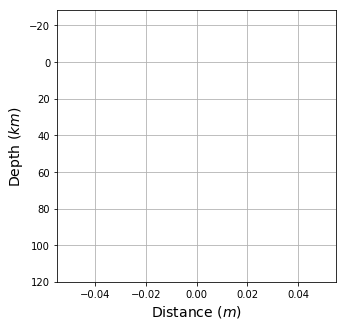

In [10]:
# Tarefa (1):
plt.figure( figsize=(5,5) )
plt.plot()
plt.ylim(120, min(z) - 20)
fs = 14 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(m)$',fontsize=fs)
plt.grid()
plt.show()

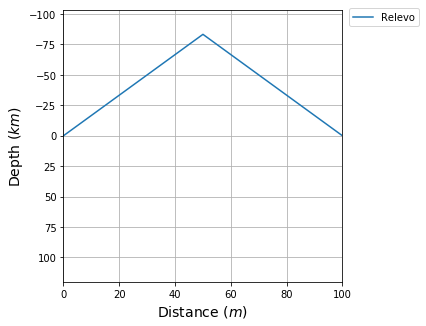

In [38]:
# Tarefa (2): (versão 1)
plt.figure( figsize=(5,5) )
plt.plot(x, z)
plt.xlim( [ x[0], x[nobs - 1]] )
plt.ylim(120, min(z) - 20) # limite a ser ajustado quando for acrescentado o Moho
fs = 14 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(m)$',fontsize=fs)
plt.legend(['Relevo'], loc=9, 
           bbox_to_anchor=(0.65, .93, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

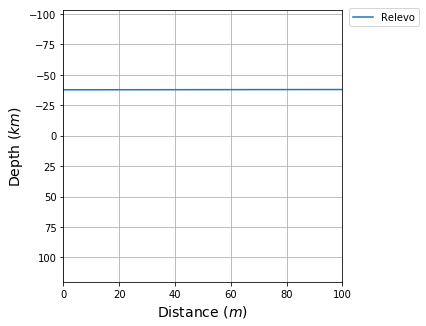

In [37]:
# Tarefa (2): (versão 2 - gaussiana) (finalizar)

def gaussian2d(x, y, sigma_x, sigma_y, x0=0, y0=0, angle=0.0):
    """
    Non-normalized 2D Gaussian function

    Parameters:

    * x, y : float or arrays
        Coordinates at which to calculate the Gaussian function
    * sigma_x, sigma_y : float
        Standard deviation in the x and y directions
    * x0, y0 : float
        Coordinates of the center of the distribution
    * angle : float
        Rotation angle of the gaussian measure from the x axis (north) growing
        positive to the east (positive y axis)

    Returns:

    * gauss : array
        Gaussian function evaluated at *x*, *y*

    """
    theta = -1 * angle * np.pi / 180.
    tmpx = 1. / sigma_x ** 2
    tmpy = 1. / sigma_y ** 2
    sintheta = np.sin(theta)
    costheta = np.cos(theta)
    a = tmpx * costheta + tmpy * sintheta ** 2
    b = (tmpy - tmpx) * costheta * sintheta
    c = tmpx * sintheta ** 2 + tmpy * costheta ** 2
    xhat = x - x0
    yhat = y - y0
    return np.exp(-(a * xhat ** 2 + 2. * b * xhat * yhat + c * yhat ** 2))

# bicliotecas necessárias:
from scipy.optimize import curve_fit
from scipy import asarray as exp

# plotando um relevo com uma gaussiana:
plt.figure( figsize=(5,5) )

mean = (sum(x*z)/sum(z))                   
sigma = (sum(z*(x-mean)**2)/sum(z)) 

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,z,p0=[1,mean,sigma], maxfev=1500)

plt.plot(x,gaus(x,*popt))
plt.xlim( [ x[0], x[nobs - 1]] )
plt.ylim(120, min(z) - 20) # limite a ser ajustado quando for acrescentado o Moho
fs = 14 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(m)$',fontsize=fs)
plt.legend(['Relevo'], loc=9, 
           bbox_to_anchor=(0.65, .93, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

In [42]:
# Tarefa (3): (Parte 1)
# Gerando o vetor com as profundidades da descontinuidade de Moho:
ref = 120 # valor para o nível de compensação
moho = np.zeros(nobs)
for i in range (nobs):
    moho[i] = ref - z[i]

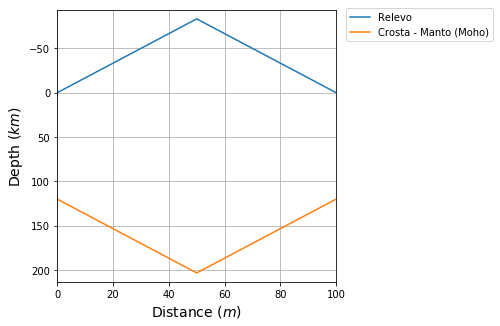

In [43]:
# Tarefa (3): (Parte 2)
plt.figure( figsize=(5,5) )
plt.plot(x, z)
plt.plot(x, moho)
plt.xlim( [ x[0], x[nobs - 1]] )
plt.ylim(max(moho) + 10, min(z) - 10)
fs = 14 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(m)$',fontsize=fs)
plt.legend(['Relevo','Crosta - Manto (Moho)'], loc=9, 
           bbox_to_anchor=(0.8, .93, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

In [44]:
# Tarefa (4): (Parte 1)
# Definindo as coordenadas dos retângulos que serão plotados:
xmed = ( x[0] + x[1] ) / 2.0
x_prisma = abs( x[0] - ( xmed ) ) 
# o valor x_prisma será usado durante a etapa de visualização gráfica para a possibilizar a geração dos retangulos

x_plot = []
z_plot = []
for i in range(nobs): # construindo listas com todas as coordenadas x e z dos pontos que formam todos os retângulos
    x_plot.append( [ x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma ] )
    z_plot.append( [ z[i], z[i], ref - z[i], ref - z[i], z[i] ] )

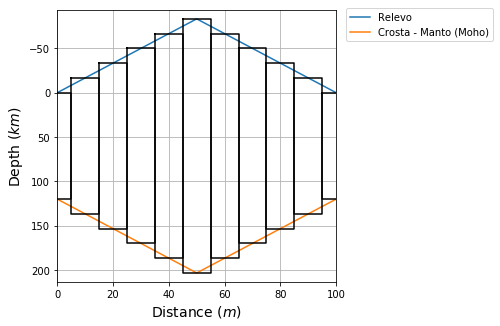

In [45]:
# Tarefa (4): (Parte 2)
plt.figure( figsize=(5,5) )
plt.plot(x, z)
plt.plot(x, moho)

for i in range(nobs):
    plt.plot( x_plot[i], z_plot[i], "black") # visualização dos retângulos

plt.xlim( [ x[0], x[nobs - 1]] )
plt.ylim(max(moho) + 10, min(z) - 10)
fs = 14 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(m)$',fontsize=fs)
plt.legend(['Relevo','Crosta - Manto (Moho)'], loc=9, 
           bbox_to_anchor=(0.8, .93, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

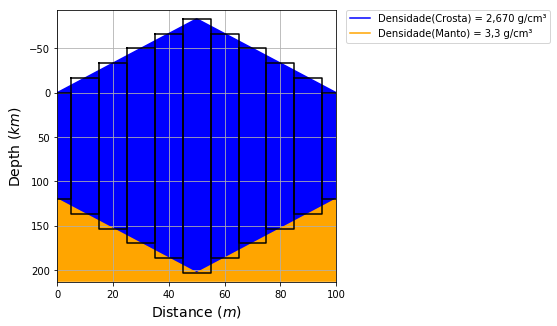

In [46]:
# Tarefa (5): 
plt.figure( figsize=(5,5) )
plt.plot(x, z, 'blue')
ylim_max = max(moho) + 10 
plt.plot(x, moho, 'orange')

for i in range(nobs):
    plt.plot( x_plot[i], z_plot[i], "black") # visualização dos retângulos
    
plt.xlim( [ x[0], x[nobs - 1]] )
plt.ylim(ylim_max, min(z) - 10)
plt.fill_between(x, z, moho, facecolor='blue')
plt.fill_between(x, moho, ylim_max, facecolor='orange')
fs = 14 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(m)$',fontsize=fs)
plt.legend(['Densidade(Crosta) = 2,670 g/cm³','Densidade(Manto) = 3,3 g/cm³'], loc=9, 
           bbox_to_anchor=(0.9, .925, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

## TODO: funcao g_prism e g_sphere a ser implementada no modulo gravity2D

In [ ]:
def g_prism(x,z,prism):
    
    '''
    This function calculates the vertical component of gravity attraction produced by a prism 
    
    (Telford, 1981)
    Inputs: x,z = arrays with cartesian coordinates in meters;
    rod: list with the following elements in this specific order: prism[x_prism, h1_prism, L, A, rho ]:
    x_prism      = horizontal distance from origin (meters)
    h1_prism      = vertical distance from origin to top (meters)
    L         = length of the thin prism (meters) (never zero!)
    rho       = density of the prism (kg/m3)
    A         = cross section of the prism (m2)
    component = the gravitational component to be computed (only z component is available yet) 
    
    Output:
    g - numpy array - the required component for the gravity in mGal. Size of gz is the same as x and z observations    
    '''

    #saving the inputs of prism:
    x_prism  = prism[0]
    h1_prism = prism[1]
    L_prism  = prism[2]
    h2_prism  = L_prism - h1_prism
    A        = prism[3]
    rho      = prism[4]
    
    #seting the variables to make the calclation?
    dx = x - x_prism
    dy = np.zeros(len(x))
    h1 = z - h1_prism
    h2 = z - h2_prism
    
    #setting some constans:
    G = 6.673e-11
    si2mGal = 100000.0
    
    #making the comptation of g
    term0 = (G*rho*A)
    
    term11 = ( dx**2 + dy**2 + h1**2)
    term1 = 1/(term11**(0.5))
    
    term21 = ( dx**2 + dy**2 + h2**2)
    term2 = 1/(term21**(0.5))

    g = term0 * abs(term1 - term2)
    
    return g*si2mGal

In [ ]:
def g_sphere(x, z, sphere1, component='z'):
    '''    
    This function calculates all components of gravity attraction produced by a solid point mass and returns the one associated to the required one.
    This is a Python implementation for the subroutine presented in Blakely (1995). On this function, there are received the value of the initial
    and final observation points (X and Y) and the properties of the sphere.
       
    Inputs:
    x - numpy array - observations in x directions (meters)
    y - numpy array - observations in y directions (meters)
    component - string - the required component to be calculated
    sphere1 - list - elements of the sphere: [x_center(meters), z_center(meters), mass(kg)]
    
    Output:
    g - numpy array - the required component for the gravity in mGal. Size of gz is the same as x and z observations    
    '''
    
    # Stablishing some conditions
    if x.shape != z.shape:
        raise ValueError("All inputs must have same shape!")
    
    # Definition for some constants
    G = 6.673e-11 # SI
    si2mGal = 100000.0
    
    
    # building a "transposed" list for correct usage of enumerate loop:
 
    sphere=[]
    for i in range( len(sphere1[0]) ): # sphere1[0] contains of all masses considered.
        sphere.append([ sphere1[0][i], sphere1[1][i], sphere1[2][i] ])

    # Setting the initial value for gravity:
    g = 0.
    gg = 0.0
    xs = np.zeros( len(sphere) )
    zs = np.zeros( len(sphere) )
    ms = np.zeros(len(sphere) )
    # loop for all point masses in list sphere
    for i,j in enumerate(sphere):
        #print (i,j)
        xs[i] = j[0]
        zs[i] = j[1]
        ms[i] = j[2]
    
        # Setting position-vector: 
        dx = xs[i] - x
        dz = zs[i] - z
    
        # properties of the sphere:
        mass = ms[i]
     
        # Compute the distance
        r = np.sqrt(dx**2 + dz**2)
    
        if component=='z':
            # Compute the vertical component 
            g = mass * dz / (r**3)
            g *= G*si2mGal
        elif component =='x':
            # Compute the vertical component 
            g = mass * dx / (r**3)
            g *= G*si2mGal
        
        gg += g
        # Return the final outpu
    return gg
###########################################################################################################################
